This notebook is to check the code from the README.md file.
First, we install all required python packages.

In [2]:
#!pip3 install tensorflow
!pip3 install scipy==0.18.1 # there are code present that need to use this specific version
!pip3 install pillow
!pip3 install scikit-image

Since the repository contains the checkpoint files, we can run the evaluation code.

In [ ]:
# evaluating set14 dataset
!python3 evaluate.py --test_dataset=set14 --save_results=true

# evaluating set5 dataset with small model
!python3 evaluate.py --test_dataset=set5 --save_results=true --layers=8 --filters=96

# evaluating all(set5,set14,bsd100) dataset
!python3 evaluate.py --test_dataset=all

# evaluate our compact version of DCSCN (c-DCSCN)
!python3 evaluate.py --scale=2 --layers=7 --filters=32 --min_filters=8 --filters_decay_gamma=1.2 --nin_filters=24 --nin_filters2=8 --reconstruct_layers=0 --self_ensemble=1 --batch_image_size=32 --pixel_shuffler_filters=1 --test_dataset=all

Test on your own image. 

In [1]:
# apply super resolution
!python3 sr.py --file=predictions.png

# apply super resolution with small model
!python3 sr.py --file=predictions.png --layers=8 --filters=96

Python Interpreter version:3.6
tensorflow version:1.13.1
numpy version:1.16.2
Session and graph initialized.
2019-05-30 17:30:08.513662: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-05-30 17:30:08.545098: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3696000000 Hz
2019-05-30 17:30:08.546485: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x30fd250 executing computations on platform Host. Devices:
2019-05-30 17:30:08.546498: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>

DCSCN v2-------------------------------------
2019/5/30 17:30:8 [dcscn_L12_F196to48_NIN_A64_PS_R1F32]
Instructions for updating:
Colocations handled automatically by placer.
From /home/spai/.virtualenvs/ISR/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.py

Loaded [predictions.png]: 773 x 512 x 3


Original Size
512
773
SR Size
1024
1546


Text(0.5, 1.0, 'After')

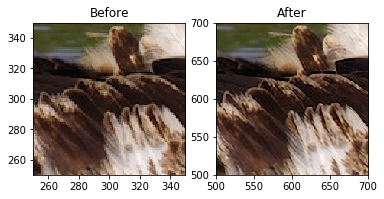

In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

zoom_x = 250
zoom_y = 350

fig = plt.figure()
a = fig.add_subplot(1,2,1)

img = mpimg.imread('predictions.png')
imgplot = plt.imshow(img)

height = img.shape[0]
width = img.shape[1]

print('Original Size')
print(height)
print(width)

plt.xlim(zoom_x, zoom_y)
plt.ylim(zoom_x, zoom_y)

a.set_title('Before')

a = fig.add_subplot(1,2,2)
sr_img = mpimg.imread('output/dcscn_L12_F196to48_NIN_A64_PS_R1F32/predictions_result.png')
sr_imgplot = plt.imshow(sr_img)

height = sr_img.shape[0]
width = sr_img.shape[1]

print('SR Size')
print(height)
print(width)

plt.xlim(zoom_x*2, zoom_y*2)
plt.ylim(zoom_x*2, zoom_y*2)
a.set_title('After')

